In [1]:
# Import das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf

cf.go_offline()
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Import do DataFrame
# Valores entre 03/02/2006 e 31/12/2015
df = pd.read_pickle('all_banks')

In [3]:
tickers = ['BAC','C', 'GS', 'JPM', 'MS', 'WFC']

In [4]:
df.head()

Bank Ticker    BAC                       ...    WFC                        
Stock Info    Open   High    Low  Close  ...   High    Low  Close    Volume
Date                                     ...                               
2006-01-03   46.92  47.18  46.15  47.08  ...  31.98  31.20  31.90  11016400
2006-01-04   47.00  47.24  46.45  46.58  ...  31.82  31.36  31.53  10871000
2006-01-05   46.58  46.83  46.32  46.64  ...  31.56  31.31  31.50  10158000
2006-01-06   46.80  46.91  46.35  46.57  ...  31.78  31.38  31.68   8403800
2006-01-09   46.72  46.97  46.36  46.60  ...  31.82  31.56  31.68   5619600

[5 rows x 30 columns]

In [5]:
# valor máximo de cada banco durante  período 
df.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [6]:
df['BAC']['Close']

Date
2006-01-03    47.08
2006-01-04    46.58
2006-01-05    46.64
2006-01-06    46.57
2006-01-09    46.60
              ...  
2015-12-24    17.27
2015-12-28    17.13
2015-12-29    17.28
2015-12-30    17.05
2015-12-31    16.83
Name: Close, Length: 2517, dtype: float64

In [7]:
# Criando um DataFrame chamado returns para salvar a diferença do "close" de um dia para o outro
returns = pd.DataFrame()

In [8]:
for tick in tickers:
    returns[tick+" Return"] = df[tick]['Close'].pct_change()

In [9]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


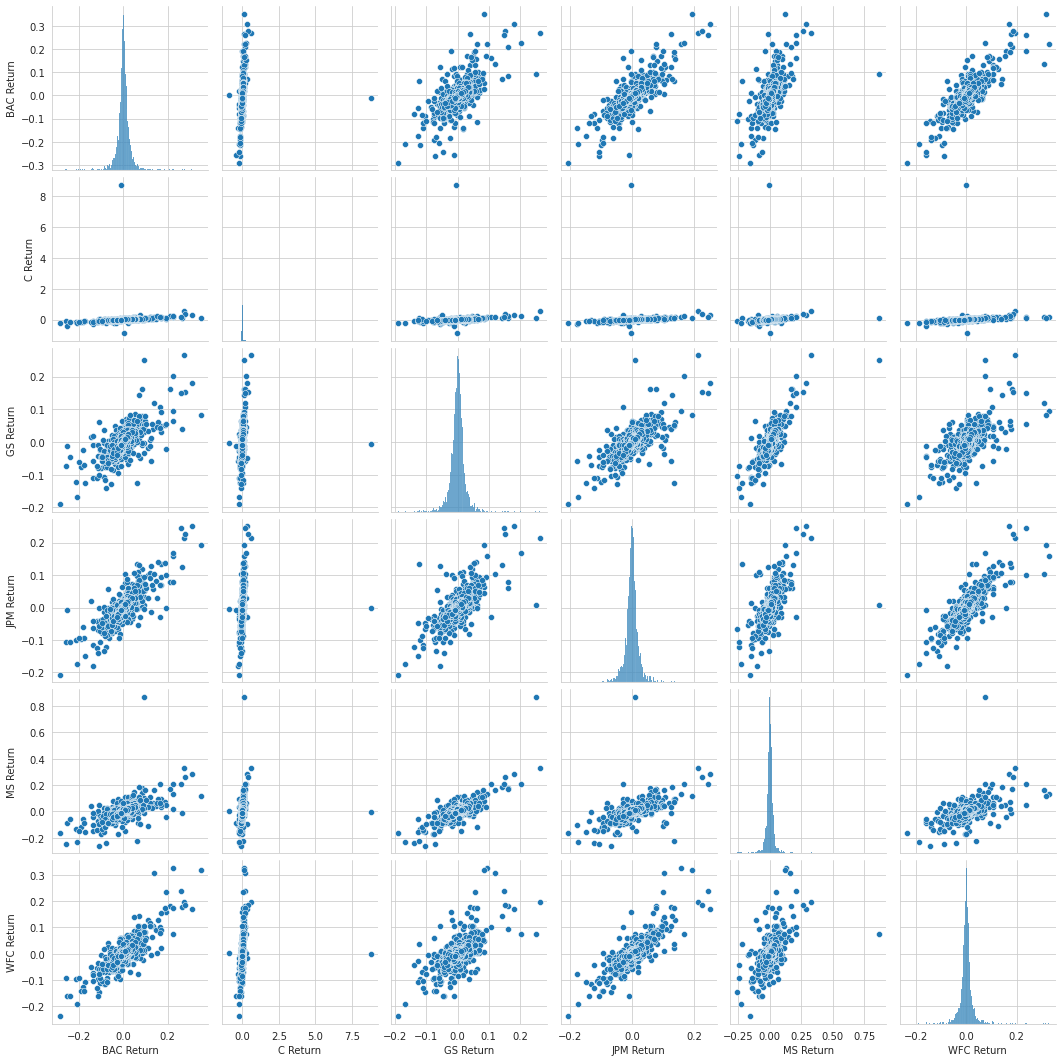

In [10]:
sns.pairplot(returns[1:])

In [11]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [12]:
# A data em que os bancos tiveram maior AUMENTO usando idxmax()
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [13]:
# A data em que os bancos tiveram maior QUEDA 
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [14]:
# Desvio padrão do Returns
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [15]:
# Desvio padrão do Returns somente entre 
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

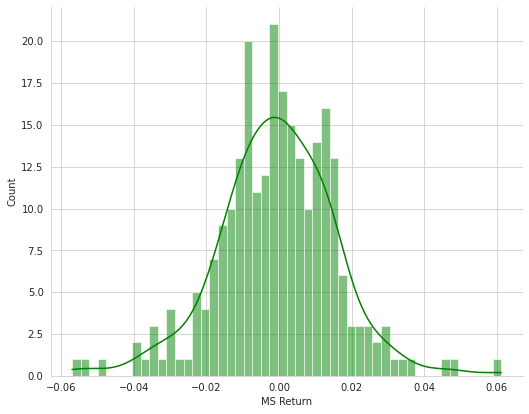

In [16]:
# Displot dos retornos da MS em 2015
g1 = sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', 
            kde=True, bins=50)
g1.fig.set_size_inches(8,6)


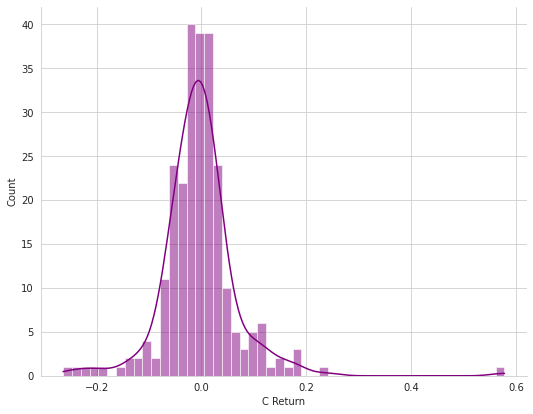

In [17]:
# Displot dos retornos da C (CitiGroup) em 2008
g2 = sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='purple', 
            kde=True, bins=50)
g2.fig.set_size_inches(8,6)


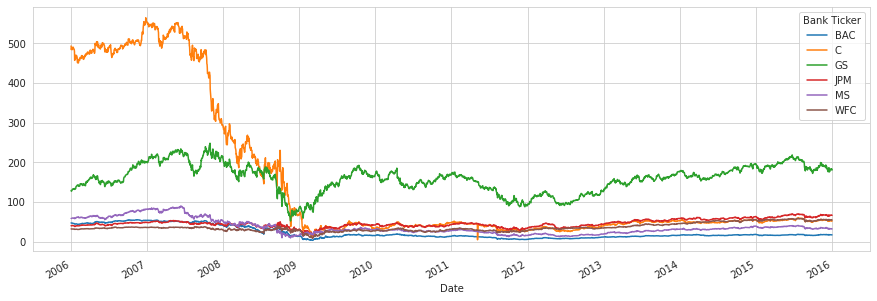

In [18]:
# More Visualization:
df.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(15,5))

In [19]:
df.xs(key='Close',axis=1,level='Stock Info').iplot()
# Isso pode não funcionar em alguns notebooks

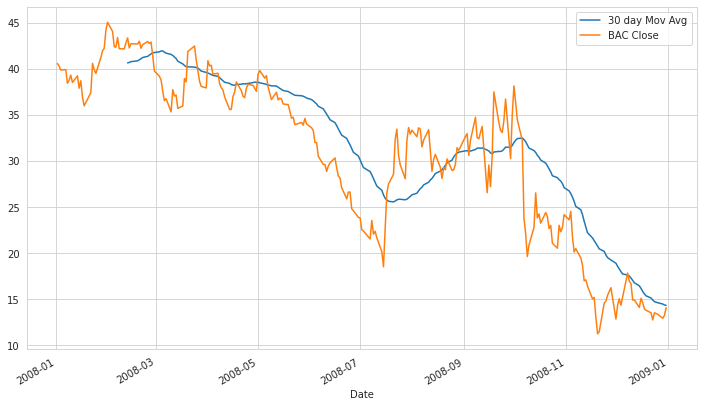

In [20]:
# Grafico BAC preço de fechamento x media preço de 30 dias
fig = plt.figure(figsize=(12,7))
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label="30 day Mov Avg")
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label="BAC Close")
plt.legend()

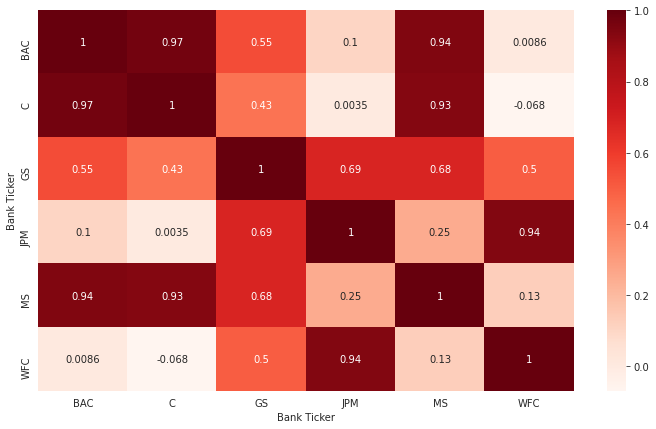

In [21]:
# Heatmap de correlação entre o stocks Close prices
fig = plt.figure(figsize=(12,7))
sns.heatmap(df.xs(key='Close', axis=1, level='Stock Info').corr(), cmap="Reds", annot=True)
# df.xs(key='Close', axis=1, level='Stock Info').corr()

<Figure size 864x504 with 0 Axes>

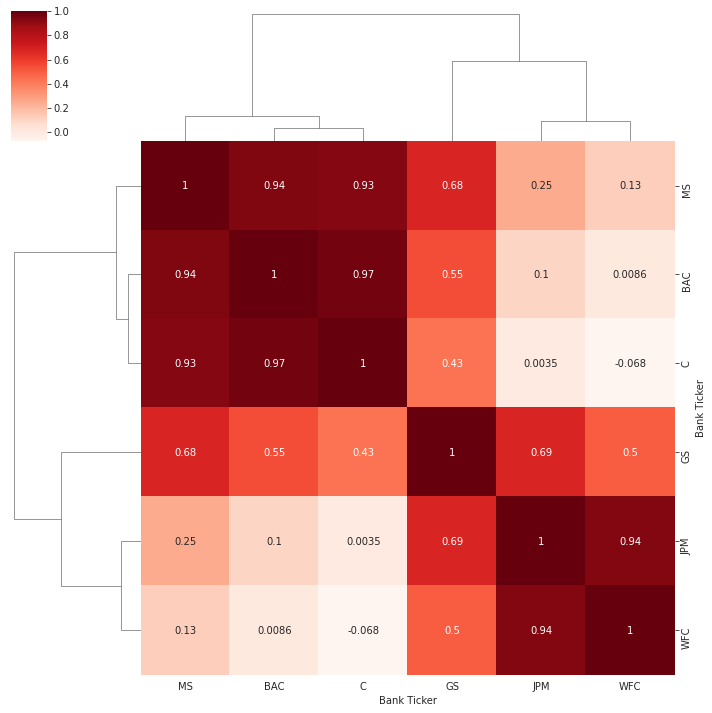

In [22]:
# Clustermap de correlação entre o stocks Close prices
fig = plt.figure(figsize=(12,7))
sns.clustermap(df.xs(key='Close', axis=1, level='Stock Info').corr(), cmap="Reds", annot=True)